Generating C_10([1, 4])
Total Vertices: 10
Total Edges: 20


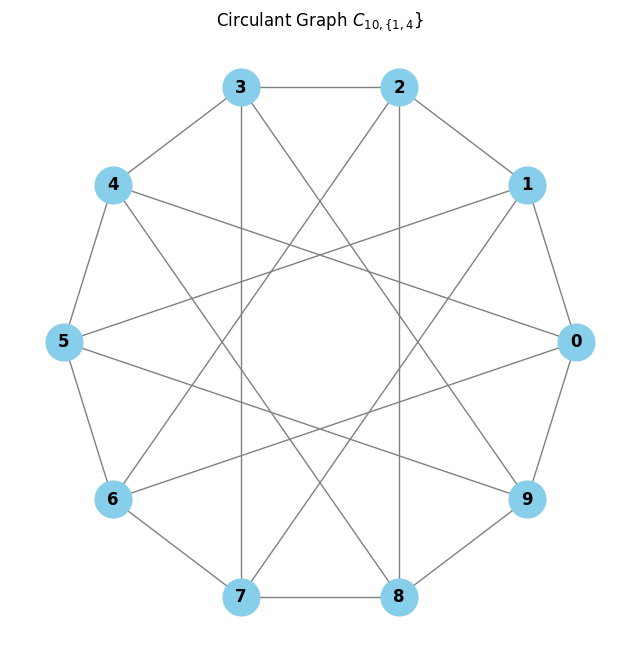


Generating C_16(2)
Total Vertices: 16
Total Edges: 16


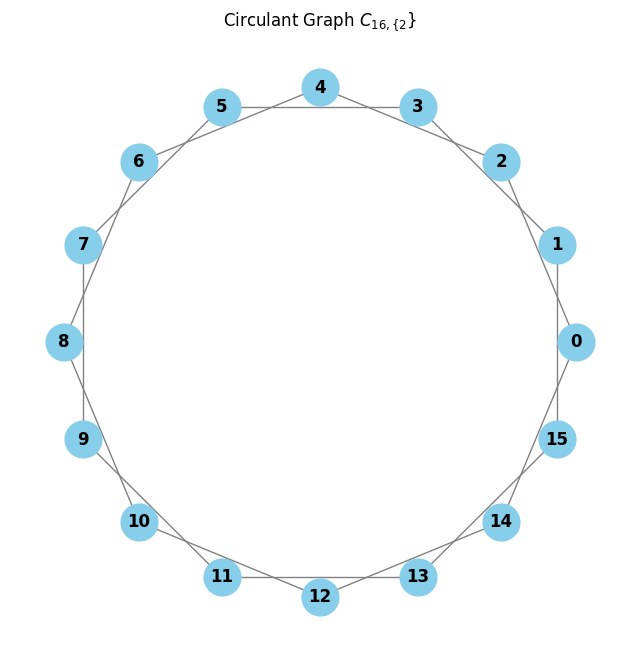

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_circulant_graph(n, r_values):
    """
    Generates a Circulant Graph C_n(r_values) as a NetworkX graph object.
    """
    if isinstance(r_values, int):
        r_values = [r_values]

    # Ensure jump values are valid: 0 < r < n/2
    valid_r_values = set()
    for r in r_values:
        if 0 < r < n / 2:
            valid_r_values.add(r)
        else:
            print(f"Warning: Jump value {r} is invalid for n={n} (must be 0 < r < n/2). Skipping.")

    if not valid_r_values:
        raise ValueError("No valid jump values provided.")

    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Add edges based on the circulant definition
    for i in range(n):
        for r in valid_r_values:
            neighbor1 = (i + r) % n
            G.add_edge(i, neighbor1)

    # Add metadata
    G.graph['n'] = n
    G.graph['r_values'] = list(valid_r_values)

    return G

def draw_circulant_graph(G):
    """
    Draws the circulant graph using a circular layout.
    Handles the title formatting for matplotlib's mathtext parser.
    """
    n = G.graph['n']
    r_values = G.graph['r_values']

    # Format the r_values list into a simple comma-separated string for the title
    r_string = ", ".join(map(str, sorted(r_values)))

    # Use a circular layout which is natural for circulant graphs
    pos = nx.circular_layout(G)

    plt.figure(figsize=(8, 8))

    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(G, pos, font_color='black', font_weight='bold')

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='gray')

    # Use the formatted r_string in the title
    # The `$` symbols denote the start/end of math text
    plt.title(f"Circulant Graph $C_{{{n}, \\{{{r_string}}}\\}}$")
    plt.axis('off')
    plt.show()

# --- Main execution example (fixed variable names) ---

# Example 1: C_10([1, 4]) - two jump values
n_val_1 = 10
r_vals_1 = [1, 4]
graph_1 = generate_circulant_graph(n_val_1, r_vals_1)

print(f"Generating C_{n_val_1}({r_vals_1})")
print(f"Total Vertices: {len(graph_1.nodes())}")
print(f"Total Edges: {len(graph_1.edges())}")
draw_circulant_graph(graph_1)

# Example 2: C_16(2) - single jump value
n_val_2 = 16
r_vals_2 = 2
graph_2 = generate_circulant_graph(n_val_2, r_vals_2)

print(f"\nGenerating C_{n_val_2}({r_vals_2})")
print(f"Total Vertices: {len(graph_2.nodes())}")
print(f"Total Edges: {len(graph_2.edges())}")
draw_circulant_graph(graph_2)
